Część 1

Wartości odstające to wartości, które różnią się znacząco od większości danych w zbiorze. Mogą one wpłynąć na analizę danych, szczególnie na statystyki opisowe, takie jak średnia czy mediana. 

Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. populacji,

1.5. PKB,

1.6. 4 innych różnych informacji, które uznasz za istotne.

Zaimportowanie danych

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')



Wykres dla nowych zachorowań, śmierci oraz szczepień

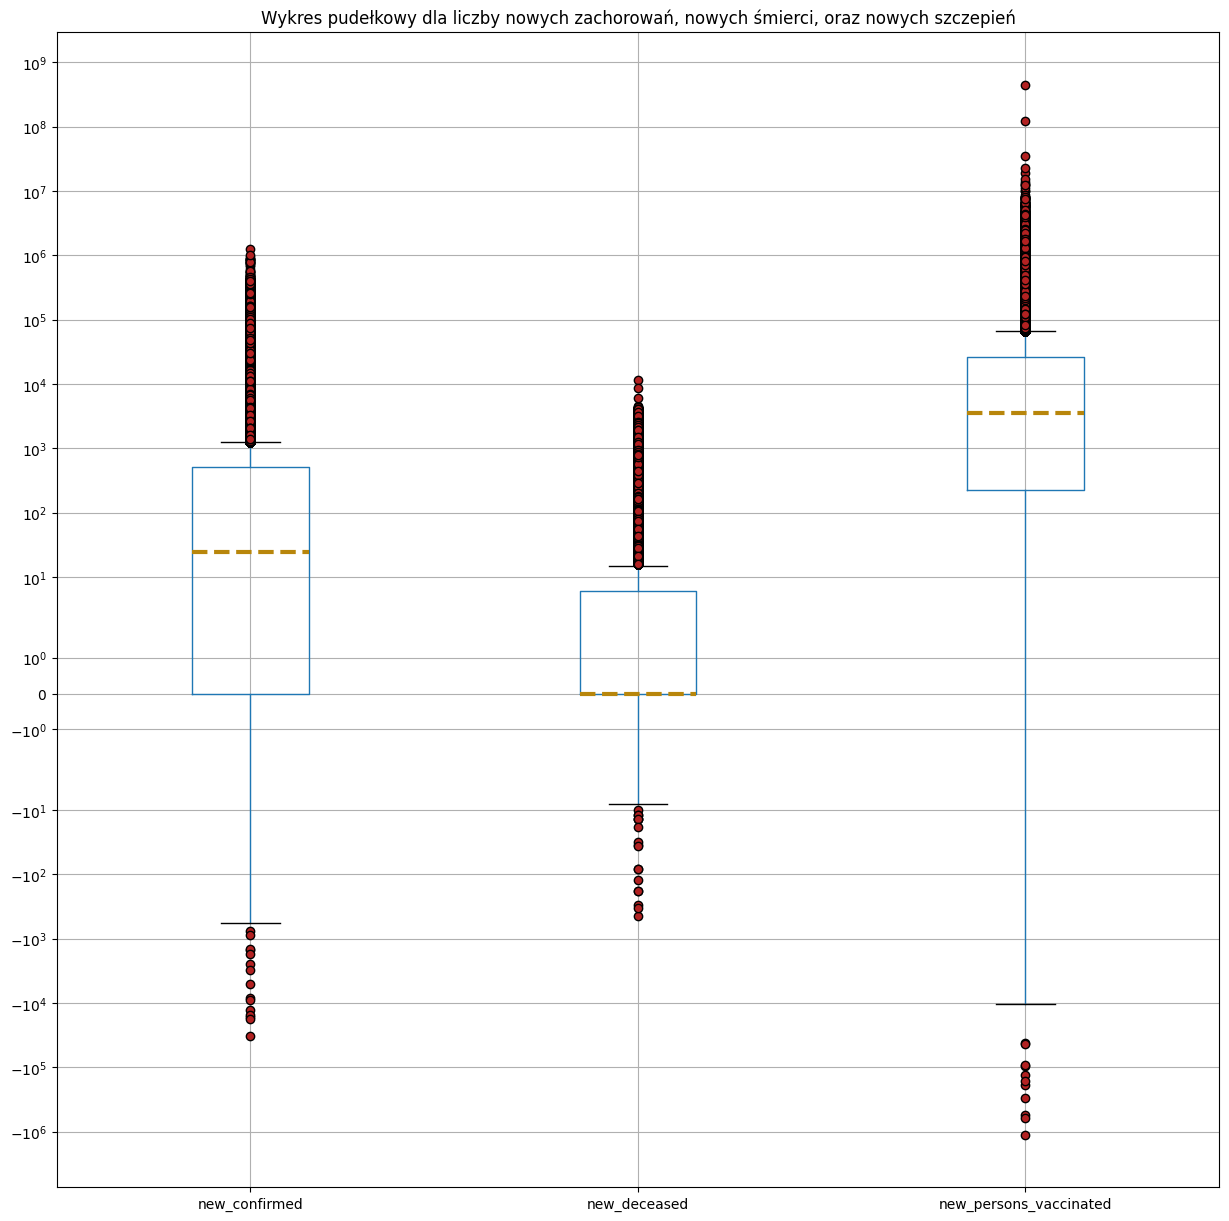

In [44]:
merged_covid_df.boxplot(["new_confirmed", "new_deceased", "new_persons_vaccinated"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

Wykres dla populacji oraz GDB

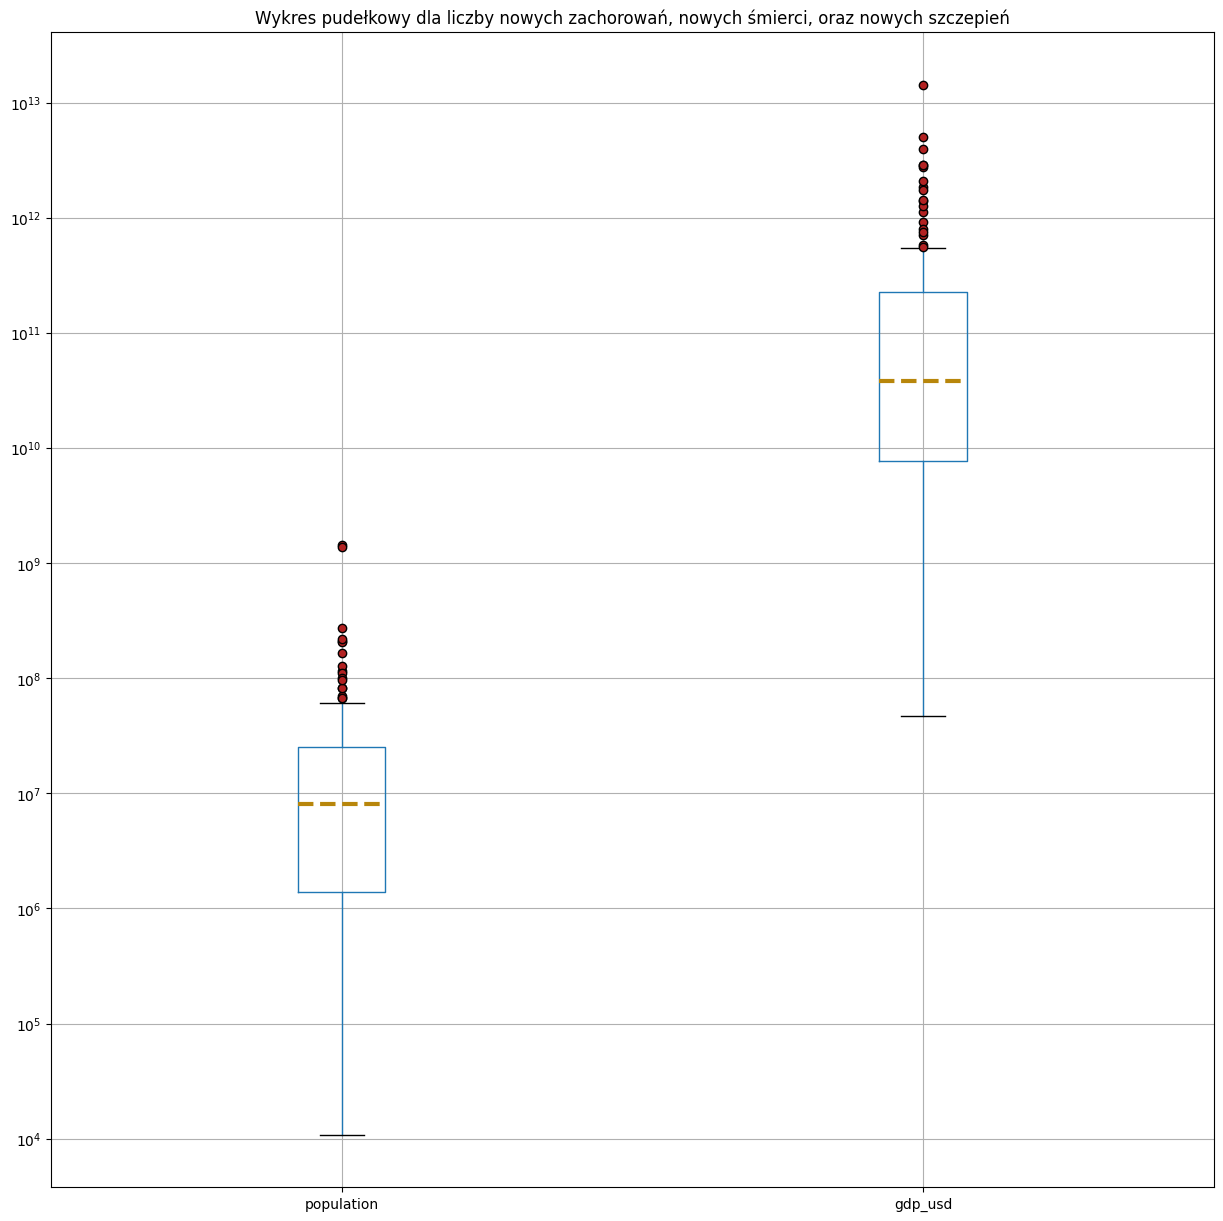

In [45]:
merged_country_df = pd.read_csv('wyniki\\merged_6_2.csv')

merged_country_df.boxplot(["population", "gdp_usd"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

1.6 4 inne informacje


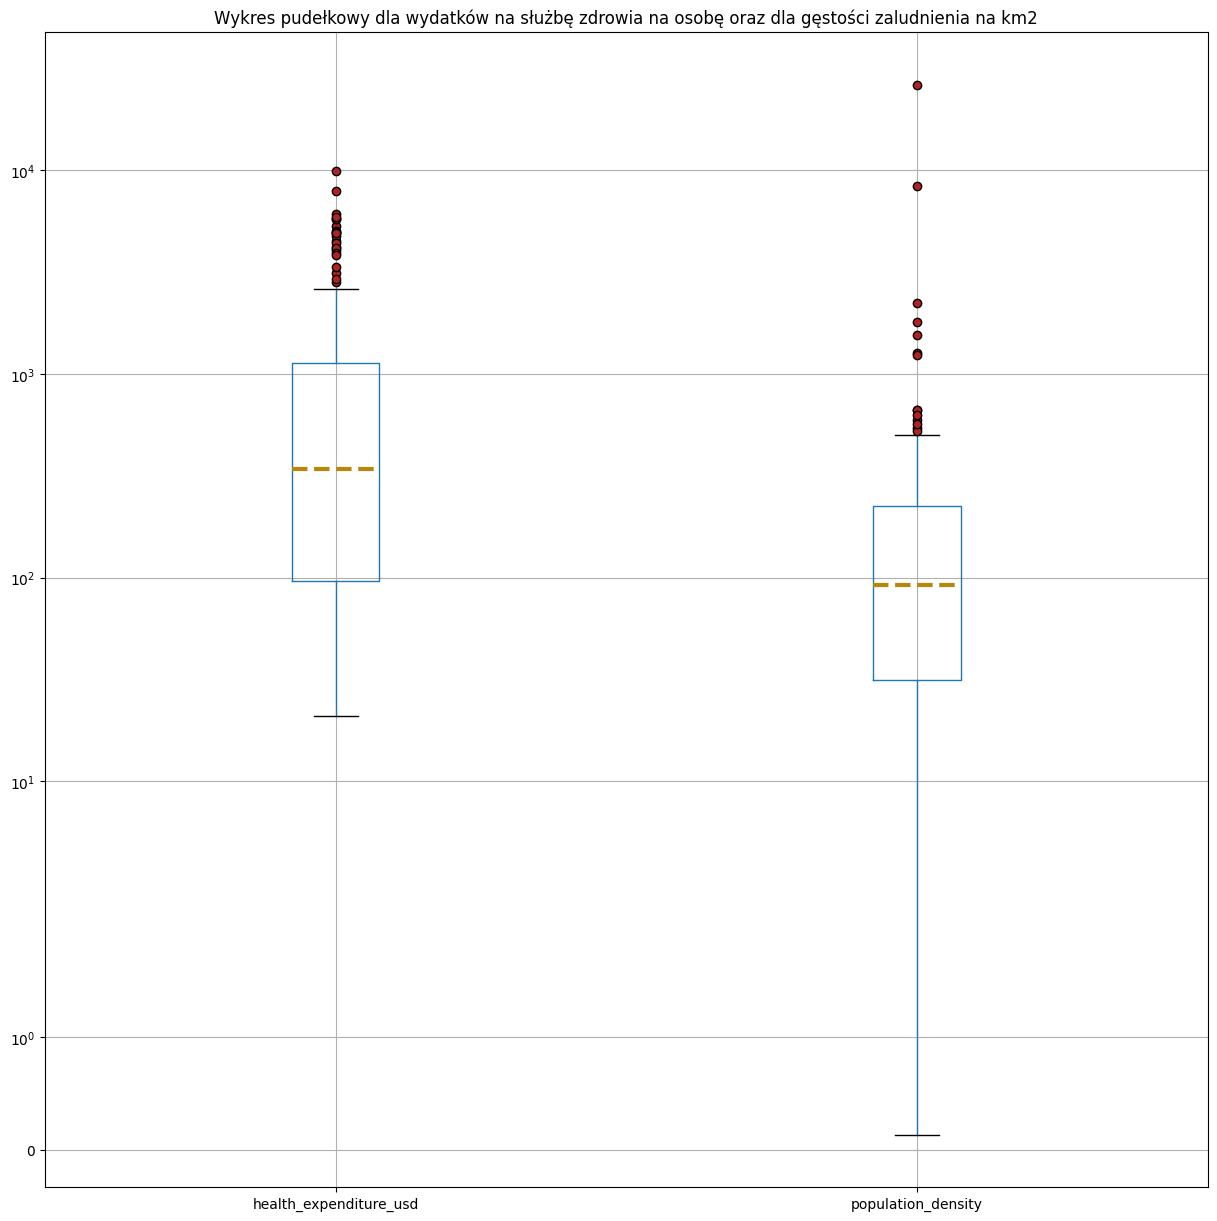

In [46]:

merged_country_df.boxplot(["health_expenditure_usd", "population_density"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla wydatków na służbę zdrowia na osobę oraz dla gęstości zaludnienia na km2')
plt.show()

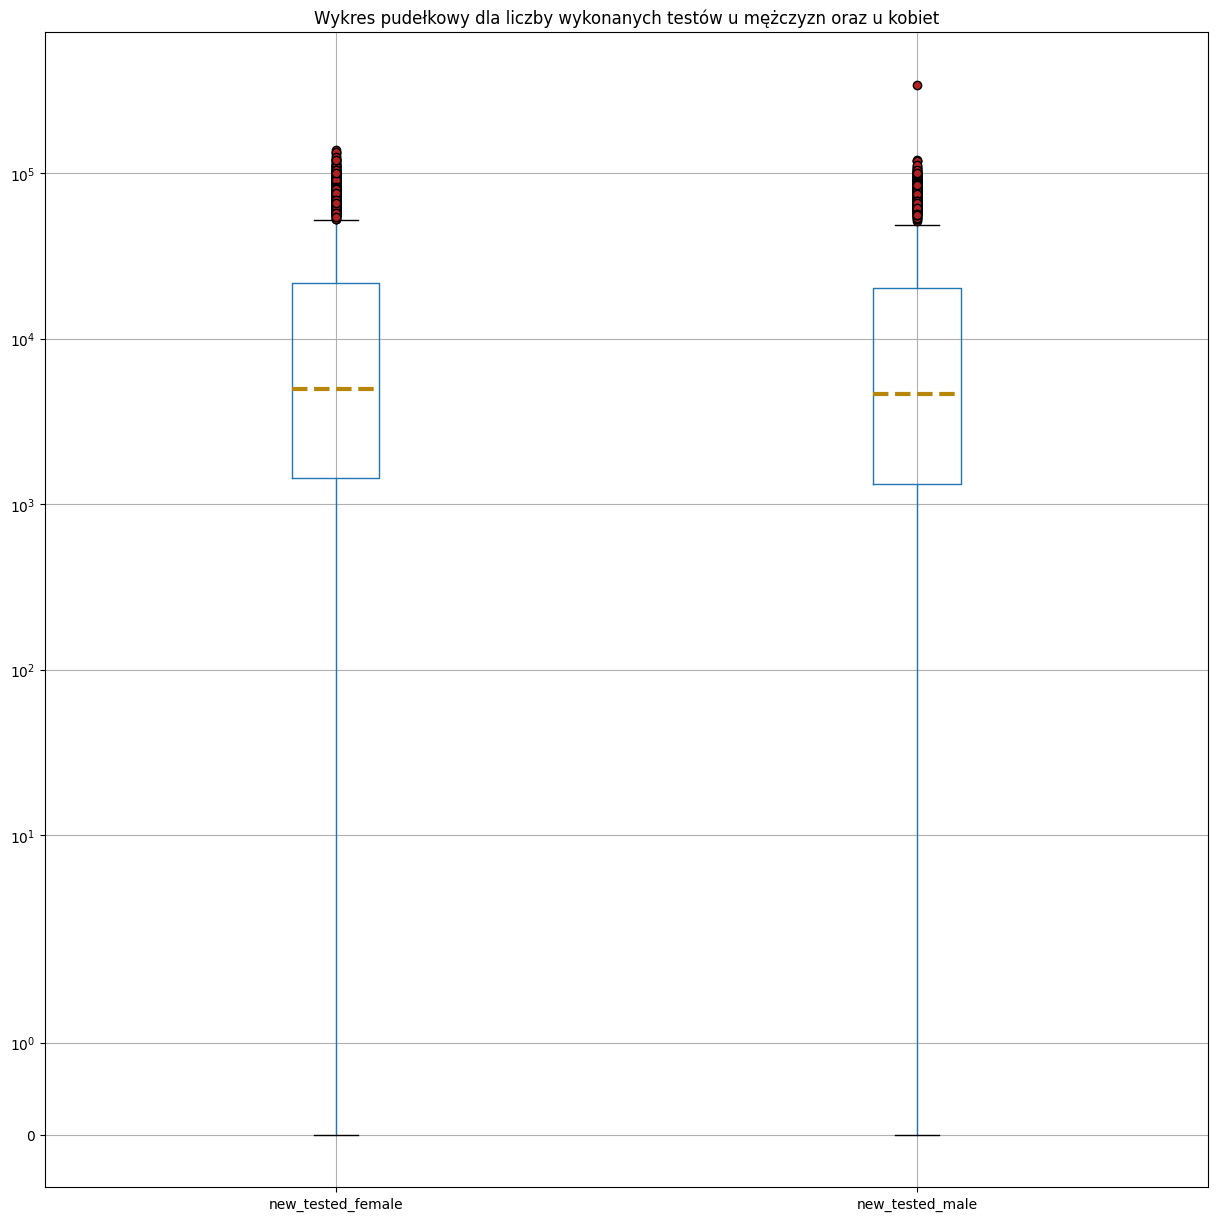

In [48]:
merged_covid_df.boxplot(["new_tested_female", "new_tested_male"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby wykonanych testów u mężczyzn oraz u kobiet')
plt.show()